In [80]:
import pandas as pd
import numpy as np
import seaborn as sns

In [81]:
data = sns.load_dataset('titanic')

In [82]:
#데이터 확인 & 각 컬럼의 의미 파악

data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [83]:
# Dtype & null 확인

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [84]:
# 최소&최대 범위 확인

data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### sibsp 컬럼과 parch 컬럼을 더해서 family_size 컬럼 만들기

In [85]:
data['family_size'] = data['sibsp'] + data['parch'] + 1

In [86]:
# sibsp 컬럼과 parch 컬럼 제거

data.drop(['sibsp','parch'],axis = 1, inplace = True)

In [87]:
data.head()

,survived,pclass,sex,age,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_size
0,0,3,male,22.0,7.2500,S,Third,man,True,NaN,Southampton,no,False,2
1,1,1,female,38.0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2
2,1,3,female,26.0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1
3,1,1,female,35.0,53.1000,S,First,woman,False,C,Southampton,yes,False,2
4,0,3,male,35.0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1


In [88]:
# 겹치는 데이터 제거
# survived = alive, embarked = embark_town, pclass = class, sex = who, age = adult_male, family_size = alone

data.drop(['alive','embark_town','class','who','adult_male','alone'],axis=1,inplace=True)

In [89]:
data.head()

,survived,pclass,sex,age,fare,embarked,deck,family_size
0,0,3,male,22.0,7.2500,S,NaN,2
1,1,1,female,38.0,71.2833,C,C,2
2,1,3,female,26.0,7.9250,S,NaN,1
3,1,1,female,35.0,53.1000,S,C,2
4,0,3,male,35.0,8.0500,S,NaN,1


### 결측치 & 이상치 처리

In [90]:
data.isna().mean()

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.198653
fare           0.000000
embarked       0.002245
deck           0.772166
family_size    0.000000
dtype: float64

In [91]:
data.describe()

,survived,pclass,age,fare,family_size
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,32.204208,1.904602
std,0.486592,0.836071,14.526497,49.693429,1.613459
min,0.000000,1.000000,0.420000,0.000000,1.000000
25%,0.000000,2.000000,20.125000,7.910400,1.000000
50%,0.000000,3.000000,28.000000,14.454200,1.000000
75%,1.000000,3.000000,38.000000,31.000000,2.000000
max,1.000000,3.000000,80.000000,512.329200,11.000000


In [92]:
data.isna().sum()

survived         0
pclass           0
sex              0
age            177
fare             0
embarked         2
deck           688
family_size      0
dtype: int64

In [93]:
data['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [94]:
# embarked 컬럼의 결측치를 가장 많이 탑승한 Southampton로 채우기

data['embarked'] = data['embarked'].fillna('S')

In [95]:
data.isna().sum()

survived         0
pclass           0
sex              0
age            177
fare             0
embarked         0
deck           688
family_size      0
dtype: int64

In [96]:
# age를 평균/중앙값 중에서 무엇으로 채울 지 고민
data['age'].median()

28.0

In [97]:
data['age'].mean()

29.69911764705882

In [98]:
# age 컬럼 결측치를 위해 등급별 나이의 평균/중앙값 확인
# a.groupby('pclass')['age'].mean()

data.groupby('pclass')['age'].median()

pclass
1    37.0
2    29.0
3    24.0
Name: age, dtype: float64

<AxesSubplot:xlabel='pclass', ylabel='age'>

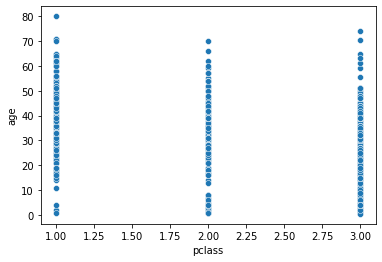

In [99]:
sns.scatterplot(x = 'pclass', y = 'age', data = data)

In [100]:
# age 컬럼 결측치를 등급별 나이의 중앙값으로 채우기

data['age'] = data['age'].fillna(data.groupby('pclass')['age'].transform('median'))

In [101]:
data.isna().sum()

survived         0
pclass           0
sex              0
age              0
fare             0
embarked         0
deck           688
family_size      0
dtype: int64

In [102]:
# deck 컬럼 결측치 비율 재확인

data.isna().mean()

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.000000
fare           0.000000
embarked       0.000000
deck           0.772166
family_size    0.000000
dtype: float64

In [103]:
data['deck'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

In [104]:
# deck 컬럼 결측치를 'U'(Unknow)라는 문자로 채우기

data['deck'] = data['deck'].astype('object')
data['deck'] = data['deck'].fillna('U')

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          891 non-null    float64
 4   fare         891 non-null    float64
 5   embarked     891 non-null    object 
 6   deck         891 non-null    object 
 7   family_size  891 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


In [106]:
data.describe()

,survived,pclass,age,fare,family_size
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.066409,32.204208,1.904602
std,0.486592,0.836071,13.244532,49.693429,1.613459
min,0.000000,1.000000,0.420000,0.000000,1.000000
25%,0.000000,2.000000,22.000000,7.910400,1.000000
50%,0.000000,3.000000,26.000000,14.454200,1.000000
75%,1.000000,3.000000,37.000000,31.000000,2.000000
max,1.000000,3.000000,80.000000,512.329200,11.000000


In [107]:
# 이상치 확인 >> vip로 예상

data['fare'].sort_values()

271      0.0000
597      0.0000
302      0.0000
633      0.0000
277      0.0000
         ...   
438    263.0000
341    263.0000
737    512.3292
258    512.3292
679    512.3292
Name: fare, Length: 891, dtype: float64

### 원-핫 인코딩 (One hot encoding)

In [108]:
data.head()

,survived,pclass,sex,age,fare,embarked,deck,family_size
0,0,3,male,22.0,7.2500,S,U,2
1,1,1,female,38.0,71.2833,C,C,2
2,1,3,female,26.0,7.9250,S,U,1
3,1,1,female,35.0,53.1000,S,C,2
4,0,3,male,35.0,8.0500,S,U,1


In [133]:
data[['sex','embarked','deck','family_size']].nunique()

sex            2
embarked       3
deck           8
family_size    9
dtype: int64

In [110]:
clean_data = pd.get_dummies(data, columns=['sex', 'embarked', 'deck', 'pclass'], drop_first=True)

In [111]:
clean_data

,survived,age,fare,family_size,sex_male,embarked_Q,embarked_S,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_U,pclass_2,pclass_3
0,0,22.0,7.2500,2,1,0,1,0,0,0,0,0,0,1,0,1
1,1,38.0,71.2833,2,0,0,0,0,1,0,0,0,0,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,0,0,0,0,1,0,1
3,1,35.0,53.1000,2,0,0,1,0,1,0,0,0,0,0,0,0
4,0,35.0,8.0500,1,1,0,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,13.0000,1,1,0,1,0,0,0,0,0,0,1,1,0
887,1,19.0,30.0000,1,0,0,1,1,0,0,0,0,0,0,0,0
888,0,24.0,23.4500,4,0,0,1,0,0,0,0,0,0,1,0,1
889,1,26.0,30.0000,1,1,0,0,0,1,0,0,0,0,0,0,0


### 데이터 로지스틱회귀 학습

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 원본 데이터 준비
df_origin = sns.load_dataset('titanic')
df_origin.dropna(subset=['age', 'embarked'], inplace=True) # 결측치 제거
df_origin = pd.get_dummies(df_origin, columns=['sex', 'embarked'], drop_first=True)

# 피쳐와 타깃 분리
X_origin = df_origin[['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_male', 'embarked_Q', 'embarked_S']]
y_origin = df_origin['survived']

# 학습과 테스트를 위한 데이터셋 분리
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X_origin, y_origin, 
																									test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 준비
model = LogisticRegression(max_iter=1000)

# 모델 학습 및 예측
model.fit(X_train_o, y_train_o)
pred_o = model.predict(X_test_o)
# 예측 결과와 테스트 정답값을 비교해서 정확도 구하기
accuracy_o = accuracy_score(y_test_o, pred_o)

In [113]:
print(f"Feature Engineering 적용 전 정확도: {accuracy_o:.4f}")

Feature Engineering 적용 전 정확도: 0.7972


In [147]:
y_feature = clean_data['survived']
X_feature = clean_data.drop('survived', axis=1)

X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_feature, y_feature, 
                                                            test_size=0.2, random_state=42)

model_f = LogisticRegression(max_iter=1000)
model_f.fit(X_train_f, y_train_f)
pred_f = model_f.predict(X_test_f)
accuracy_f = accuracy_score(y_test_f, pred_f)


print(f"Feature Engineering 적용 후 정확도: {accuracy_f:.4f}")

Feature Engineering 적용 후 정확도: 0.8101


### 스케일링 (Scaling)

In [122]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [123]:
ss = StandardScaler()

In [124]:
ss.fit(clean_data)

StandardScaler()

In [125]:
ss_data = pd.DataFrame(ss.transform(clean_data), columns = clean_data.columns)

In [126]:
ss_data

,survived,age,fare,family_size,sex_male,embarked_Q,embarked_S,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_U,pclass_2,pclass_3
0,-0.789272,-0.533834,-0.502445,0.059160,0.737695,-0.307562,0.615838,-0.235981,-0.266296,-0.196116,-0.193009,-0.121681,-0.067153,0.543193,-0.510152,0.902587
1,1.266990,0.674891,0.786845,0.059160,-1.355574,-0.307562,-1.623803,-0.235981,3.755222,-0.196116,-0.193009,-0.121681,-0.067153,-1.840968,-0.510152,-1.107926
2,1.266990,-0.231653,-0.488854,-0.560975,-1.355574,-0.307562,0.615838,-0.235981,-0.266296,-0.196116,-0.193009,-0.121681,-0.067153,0.543193,-0.510152,0.902587
3,1.266990,0.448255,0.420730,0.059160,-1.355574,-0.307562,0.615838,-0.235981,3.755222,-0.196116,-0.193009,-0.121681,-0.067153,-1.840968,-0.510152,-1.107926
4,-0.789272,0.448255,-0.486337,-0.560975,0.737695,-0.307562,0.615838,-0.235981,-0.266296,-0.196116,-0.193009,-0.121681,-0.067153,0.543193,-0.510152,0.902587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.789272,-0.156107,-0.386671,-0.560975,0.737695,-0.307562,0.615838,-0.235981,-0.266296,-0.196116,-0.193009,-0.121681,-0.067153,0.543193,1.960202,-1.107926
887,1.266990,-0.760469,-0.044381,-0.560975,-1.355574,-0.307562,0.615838,4.237623,-0.266296,-0.196116,-0.193009,-0.121681,-0.067153,-1.840968,-0.510152,-1.107926
888,-0.789272,-0.382743,-0.176263,1.299429,-1.355574,-0.307562,0.615838,-0.235981,-0.266296,-0.196116,-0.193009,-0.121681,-0.067153,0.543193,-0.510152,0.902587
889,1.266990,-0.231653,-0.044381,-0.560975,0.737695,-0.307562,-1.623803,-0.235981,3.755222,-0.196116,-0.193009,-0.121681,-0.067153,-1.840968,-0.510152,-1.107926


In [148]:
y_feature = ss_data['survived']
X_feature = ss_data.drop('survived', axis=1)

X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_feature, y_feature, 
                                                            test_size=0.2, random_state=42)

model_f = LogisticRegression(max_iter=1000)
model_f.fit(X_train_f, y_train_f)
pred_f = model_f.predict(X_test_f)
accuracy_f = accuracy_score(y_test_f, pred_f)


print(f"Feature Engineering 적용 후 정확도: {accuracy_f:.4f}")

ValueError: Unknown label type: 'continuous'

In [127]:
mm = MinMaxScaler()

In [128]:
mm.fit(clean_data)

MinMaxScaler()

In [129]:
mm_data = pd.DataFrame(mm.transform(clean_data), columns = clean_data.columns)

In [130]:
mm_data

,survived,age,fare,family_size,sex_male,embarked_Q,embarked_S,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_U,pclass_2,pclass_3
0,0.0,0.271174,0.014151,0.1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1.0,0.472229,0.139136,0.1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.321438,0.015469,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,1.0,0.434531,0.103644,0.1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.434531,0.015713,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,0.334004,0.025374,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
887,1.0,0.233476,0.058556,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
888,0.0,0.296306,0.045771,0.3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
889,1.0,0.321438,0.058556,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [149]:
y_feature = mm_data['survived']
X_feature = mm_data.drop('survived', axis=1)

X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_feature, y_feature, 
                                                            test_size=0.2, random_state=42)

model_f = LogisticRegression(max_iter=1000)
model_f.fit(X_train_f, y_train_f)
pred_f = model_f.predict(X_test_f)
accuracy_f = accuracy_score(y_test_f, pred_f)


print(f"Feature Engineering 적용 후 정확도: {accuracy_f:.4f}")

Feature Engineering 적용 후 정확도: 0.8101


### age 그룹화하기

##### 20세 미만 / 20세 이상 ~ 40세 미만 / 40세 이상

<AxesSubplot:xlabel='survived', ylabel='age'>

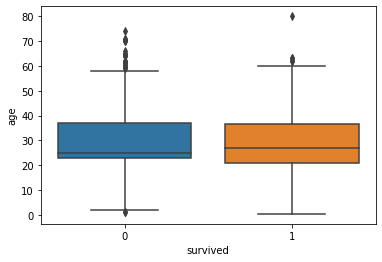

In [136]:
sns.boxplot(x = 'survived', y = 'age', data = data)

In [137]:
def get_age_group(age):
    if age < 20 :
        return 0 # 20세 미만
    elif age < 40:
        return 1  # 20세~39세
    else:
        return 2  # 40세 이상

In [178]:
data['age_group'] = data['age'].apply(get_age_group)

In [179]:
data.head()

,survived,pclass,sex,age,fare,embarked,deck,family_size,age_group
0,0,3,male,22.0,7.2500,S,U,2,1
1,1,1,female,38.0,71.2833,C,C,2,1
2,1,3,female,26.0,7.9250,S,U,1,1
3,1,1,female,35.0,53.1000,S,C,2,1
4,0,3,male,35.0,8.0500,S,U,1,1


In [180]:
data_new = data.drop(['age'], axis=1)

In [181]:
data_new

,survived,pclass,sex,fare,embarked,deck,family_size,age_group
0,0,3,male,7.2500,S,U,2,1
1,1,1,female,71.2833,C,C,2,1
2,1,3,female,7.9250,S,U,1,1
3,1,1,female,53.1000,S,C,2,1
4,0,3,male,8.0500,S,U,1,1
...,...,...,...,...,...,...,...,...
886,0,2,male,13.0000,S,U,1,1
887,1,1,female,30.0000,S,B,1,0
888,0,3,female,23.4500,S,U,4,1
889,1,1,male,30.0000,C,C,1,1


In [182]:
data_new = pd.get_dummies(data_new, columns=['sex', 'embarked', 'deck', 'pclass'], drop_first=True)

In [183]:
data_new

,survived,fare,family_size,age_group,sex_male,embarked_Q,embarked_S,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_U,pclass_2,pclass_3
0,0,7.2500,2,1,1,0,1,0,0,0,0,0,0,1,0,1
1,1,71.2833,2,1,0,0,0,0,1,0,0,0,0,0,0,0
2,1,7.9250,1,1,0,0,1,0,0,0,0,0,0,1,0,1
3,1,53.1000,2,1,0,0,1,0,1,0,0,0,0,0,0,0
4,0,8.0500,1,1,1,0,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,13.0000,1,1,1,0,1,0,0,0,0,0,0,1,1,0
887,1,30.0000,1,0,0,0,1,1,0,0,0,0,0,0,0,0
888,0,23.4500,4,1,0,0,1,0,0,0,0,0,0,1,0,1
889,1,30.0000,1,1,1,0,0,0,1,0,0,0,0,0,0,0


In [150]:
y_feature = data_new['survived']
X_feature = data_new.drop('survived', axis=1)

X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_feature, y_feature, 
                                                            test_size=0.2, random_state=42)

model_f = LogisticRegression(max_iter=1000)
model_f.fit(X_train_f, y_train_f)
pred_f = model_f.predict(X_test_f)
accuracy_f = accuracy_score(y_test_f, pred_f)


print(f"Feature Engineering 적용 후 정확도: {accuracy_f:.4f}")

Feature Engineering 적용 후 정확도: 0.7933


In [186]:
def new_age_group(age):
    if age < 10 :
        return 0 # 10세 미만
    elif age < 40:
        return 1  # 20세~39세
    else:
        return 2  # 40세 이상

In [187]:
data['age_group'] = data['age'].apply(new_age_group)

In [188]:
data

,survived,pclass,sex,age,fare,embarked,deck,family_size,age_group
0,0,3,male,22.0,7.2500,S,U,2,1
1,1,1,female,38.0,71.2833,C,C,2,1
2,1,3,female,26.0,7.9250,S,U,1,1
3,1,1,female,35.0,53.1000,S,C,2,1
4,0,3,male,35.0,8.0500,S,U,1,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,U,1,1
887,1,1,female,19.0,30.0000,S,B,1,1
888,0,3,female,24.0,23.4500,S,U,4,1
889,1,1,male,26.0,30.0000,C,C,1,1


In [189]:
data_sec = data.drop(['age'], axis=1)

In [190]:
data_sec = pd.get_dummies(data_sec, columns=['sex', 'embarked', 'deck', 'pclass'], drop_first=True)

In [191]:
y_feature = data_sec['survived']
X_feature = data_sec.drop('survived', axis=1)

X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_feature, y_feature, 
                                                            test_size=0.2, random_state=42)

model_f = LogisticRegression(max_iter=1000)
model_f.fit(X_train_f, y_train_f)
pred_f = model_f.predict(X_test_f)
accuracy_f = accuracy_score(y_test_f, pred_f)


print(f"Feature Engineering 적용 후 정확도: {accuracy_f:.4f}")

Feature Engineering 적용 후 정확도: 0.8045


In [192]:
data_sec['age_group'].value_counts()

1    666
2    163
0     62
Name: age_group, dtype: int64

In [184]:
data_new['age_group'].value_counts()

1    564
0    164
2    163
Name: age_group, dtype: int64

In [197]:
data

,survived,pclass,sex,age,fare,embarked,deck,family_size,age_group
0,0,3,male,22.0,7.2500,S,U,2,1
1,1,1,female,38.0,71.2833,C,C,2,1
2,1,3,female,26.0,7.9250,S,U,1,1
3,1,1,female,35.0,53.1000,S,C,2,1
4,0,3,male,35.0,8.0500,S,U,1,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,U,1,1
887,1,1,female,19.0,30.0000,S,B,1,1
888,0,3,female,24.0,23.4500,S,U,4,1
889,1,1,male,26.0,30.0000,C,C,1,1


In [198]:
data = data.drop(['age_group'], axis=1)

### fare 그룹 나누기

In [210]:
import numpy as np

<AxesSubplot:xlabel='survived', ylabel='fare'>

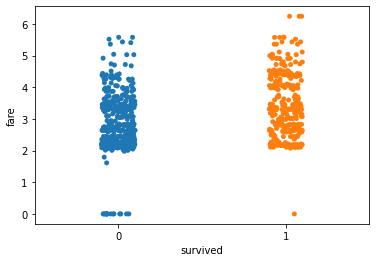

In [214]:
sns.stripplot(x=data['survived'], y=np.log1p(data['fare']))

<AxesSubplot:xlabel='pclass', ylabel='fare'>

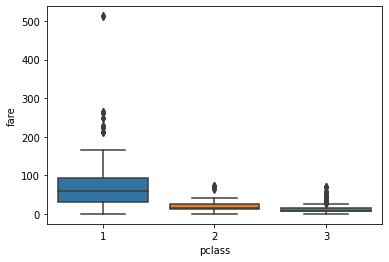

In [215]:
sns.boxplot(data=data, x='pclass', y='fare')

In [216]:
data['fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

In [217]:
def get_fare_group(fare):
    if fare < 8:        # 7.91 이하는 0(가장 싼 표)
        return 0
    elif fare < 15:     # 14.45 이하는 1
        return 1
    elif fare < 31:     # 31.0 이하는 2
        return 2
    else:               # 31.0 초과는 3(가장 비싼 표)
        return 3

In [218]:
data['fare_group'] = data['fare'].apply(get_fare_group)

In [219]:
data.head()

,survived,pclass,sex,age,fare,embarked,deck,family_size,fare_group
0,0,3,male,22.0,7.2500,S,U,2,0
1,1,1,female,38.0,71.2833,C,C,2,3
2,1,3,female,26.0,7.9250,S,U,1,0
3,1,1,female,35.0,53.1000,S,C,2,3
4,0,3,male,35.0,8.0500,S,U,1,1


In [220]:
final_data = data.drop(['fare'], axis=1)

In [221]:
final_data = pd.get_dummies(final_data, columns=['sex', 'embarked', 'deck', 'pclass'], drop_first=True)

In [222]:
final_data

,survived,age,family_size,fare_group,sex_male,embarked_Q,embarked_S,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_U,pclass_2,pclass_3
0,0,22.0,2,0,1,0,1,0,0,0,0,0,0,1,0,1
1,1,38.0,2,3,0,0,0,0,1,0,0,0,0,0,0,0
2,1,26.0,1,0,0,0,1,0,0,0,0,0,0,1,0,1
3,1,35.0,2,3,0,0,1,0,1,0,0,0,0,0,0,0
4,0,35.0,1,1,1,0,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,1,1,1,0,1,0,0,0,0,0,0,1,1,0
887,1,19.0,1,2,0,0,1,1,0,0,0,0,0,0,0,0
888,0,24.0,4,2,0,0,1,0,0,0,0,0,0,1,0,1
889,1,26.0,1,2,1,0,0,0,1,0,0,0,0,0,0,0


In [223]:
y_feature = final_data['survived']
X_feature = final_data.drop('survived', axis=1)

X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_feature, y_feature, 
                                                            test_size=0.2, random_state=42)

model_f = LogisticRegression(max_iter=1000)
model_f.fit(X_train_f, y_train_f)
pred_f = model_f.predict(X_test_f)
accuracy_f = accuracy_score(y_test_f, pred_f)


print(f"Feature Engineering 적용 후 정확도: {accuracy_f:.4f}")

Feature Engineering 적용 후 정확도: 0.8212


In [231]:
data['family_size'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: family_size, dtype: int64

<AxesSubplot:xlabel='survived', ylabel='family_size'>

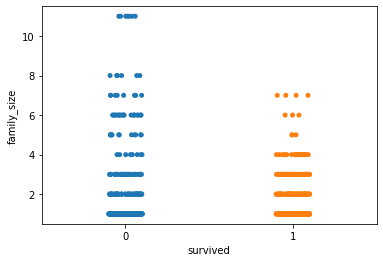

In [233]:
sns.stripplot(x=data['survived'], y=data['family_size'])

In [234]:
data

,survived,pclass,sex,age,fare,embarked,deck,family_size,fare_group
0,0,3,male,22.0,7.2500,S,U,2,0
1,1,1,female,38.0,71.2833,C,C,2,3
2,1,3,female,26.0,7.9250,S,U,1,0
3,1,1,female,35.0,53.1000,S,C,2,3
4,0,3,male,35.0,8.0500,S,U,1,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,U,1,1
887,1,1,female,19.0,30.0000,S,B,1,2
888,0,3,female,24.0,23.4500,S,U,4,2
889,1,1,male,26.0,30.0000,C,C,1,2


In [236]:
def get_family_group(size):
    if size == 1:
        return 0  # Solo (생존율 낮음)
    elif size <= 4:
        return 1  # Small (생존율 높음 - Best!)
    else:
        return 2  # Large (생존율 매우 낮음)

In [237]:
data['family_group'] = data['family_size'].apply(get_family_group)

In [239]:
data

,survived,pclass,sex,age,fare,embarked,deck,family_size,fare_group,family_group
0,0,3,male,22.0,7.2500,S,U,2,0,1
1,1,1,female,38.0,71.2833,C,C,2,3,1
2,1,3,female,26.0,7.9250,S,U,1,0,0
3,1,1,female,35.0,53.1000,S,C,2,3,1
4,0,3,male,35.0,8.0500,S,U,1,1,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,U,1,1,0
887,1,1,female,19.0,30.0000,S,B,1,2,0
888,0,3,female,24.0,23.4500,S,U,4,2,1
889,1,1,male,26.0,30.0000,C,C,1,2,0


In [240]:
my_data = data.drop(['fare','family_size'], axis=1)

In [241]:
my_data

,survived,pclass,sex,age,embarked,deck,fare_group,family_group
0,0,3,male,22.0,S,U,0,1
1,1,1,female,38.0,C,C,3,1
2,1,3,female,26.0,S,U,0,0
3,1,1,female,35.0,S,C,3,1
4,0,3,male,35.0,S,U,1,0
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,S,U,1,0
887,1,1,female,19.0,S,B,2,0
888,0,3,female,24.0,S,U,2,1
889,1,1,male,26.0,C,C,2,0


In [242]:
last_data = pd.get_dummies(my_data, columns=['sex', 'embarked', 'deck', 'pclass'], drop_first=True)

In [243]:
y_feature = last_data['survived']
X_feature = last_data.drop('survived', axis=1)

X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_feature, y_feature, 
                                                            test_size=0.2, random_state=42)

model_f = LogisticRegression(max_iter=1000)
model_f.fit(X_train_f, y_train_f)
pred_f = model_f.predict(X_test_f)
accuracy_f = accuracy_score(y_test_f, pred_f)


print(f"Feature Engineering 적용 후 정확도: {accuracy_f:.4f}")

Feature Engineering 적용 후 정확도: 0.8156


In [244]:
def new_age_group(age):
    if age < 10 :
        return 0 # 10세 미만
    elif age < 40:
        return 1  # 20세~39세
    else:
        return 2  # 40세 이상

In [245]:
my_data['age_group'] = my_data['age'].apply(get_family_group)

In [246]:
my_data

,survived,pclass,sex,age,embarked,deck,fare_group,family_group,age_group
0,0,3,male,22.0,S,U,0,1,2
1,1,1,female,38.0,C,C,3,1,2
2,1,3,female,26.0,S,U,0,0,2
3,1,1,female,35.0,S,C,3,1,2
4,0,3,male,35.0,S,U,1,0,2
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,S,U,1,0,2
887,1,1,female,19.0,S,B,2,0,2
888,0,3,female,24.0,S,U,2,1,2
889,1,1,male,26.0,C,C,2,0,2


In [247]:
my_data = data.drop(['age'], axis=1)

In [248]:
my_data = pd.get_dummies(my_data, columns=['sex', 'embarked', 'deck', 'pclass'], drop_first=True)

In [249]:
y_feature = my_data['survived']
X_feature = my_data.drop('survived', axis=1)

X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_feature, y_feature, 
                                                            test_size=0.2, random_state=42)

model_f = LogisticRegression(max_iter=1000)
model_f.fit(X_train_f, y_train_f)
pred_f = model_f.predict(X_test_f)
accuracy_f = accuracy_score(y_test_f, pred_f)


print(f"Feature Engineering 적용 후 정확도: {accuracy_f:.4f}")

Feature Engineering 적용 후 정확도: 0.7821


In [250]:
data

,survived,pclass,sex,age,fare,embarked,deck,family_size,fare_group,family_group
0,0,3,male,22.0,7.2500,S,U,2,0,1
1,1,1,female,38.0,71.2833,C,C,2,3,1
2,1,3,female,26.0,7.9250,S,U,1,0,0
3,1,1,female,35.0,53.1000,S,C,2,3,1
4,0,3,male,35.0,8.0500,S,U,1,1,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,U,1,1,0
887,1,1,female,19.0,30.0000,S,B,1,2,0
888,0,3,female,24.0,23.4500,S,U,4,2,1
889,1,1,male,26.0,30.0000,C,C,1,2,0


In [251]:
my_last_data = data.drop(['family_size','fare_group'], axis=1)

In [252]:
my_last_data

,survived,pclass,sex,age,fare,embarked,deck,family_group
0,0,3,male,22.0,7.2500,S,U,1
1,1,1,female,38.0,71.2833,C,C,1
2,1,3,female,26.0,7.9250,S,U,0
3,1,1,female,35.0,53.1000,S,C,1
4,0,3,male,35.0,8.0500,S,U,0
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,U,0
887,1,1,female,19.0,30.0000,S,B,0
888,0,3,female,24.0,23.4500,S,U,1
889,1,1,male,26.0,30.0000,C,C,0


In [253]:
my_last_data = pd.get_dummies(my_last_data, columns=['sex', 'embarked', 'deck', 'pclass'], drop_first=True)

In [254]:
y_feature = my_last_data['survived']
X_feature = my_last_data.drop('survived', axis=1)

X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_feature, y_feature, 
                                                            test_size=0.2, random_state=42)

model_f = LogisticRegression(max_iter=1000)
model_f.fit(X_train_f, y_train_f)
pred_f = model_f.predict(X_test_f)
accuracy_f = accuracy_score(y_test_f, pred_f)


print(f"Feature Engineering 적용 후 정확도: {accuracy_f:.4f}")

Feature Engineering 적용 후 정확도: 0.8156


In [255]:
def new_family_group(size):
    if size == 1:
        return 0  # Solo (생존율 낮음)
    elif size <= 3:
        return 1  # Small (생존율 높음 - Best!)
    else:
        return 2  # Large (생존율 매우 낮음)

In [256]:
data['family_group'] = data['family_size'].apply(new_family_group)

In [257]:
my_last_data = data.drop(['family_size','fare_group'], axis=1)

In [258]:
my_last_data

,survived,pclass,sex,age,fare,embarked,deck,family_group
0,0,3,male,22.0,7.2500,S,U,1
1,1,1,female,38.0,71.2833,C,C,1
2,1,3,female,26.0,7.9250,S,U,0
3,1,1,female,35.0,53.1000,S,C,1
4,0,3,male,35.0,8.0500,S,U,0
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,U,0
887,1,1,female,19.0,30.0000,S,B,0
888,0,3,female,24.0,23.4500,S,U,2
889,1,1,male,26.0,30.0000,C,C,0


In [259]:
my_last_data = pd.get_dummies(my_last_data, columns=['sex', 'embarked', 'deck', 'pclass'], drop_first=True)

In [261]:
y_feature = my_last_data['survived']
X_feature = my_last_data.drop('survived', axis=1)

X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_feature, y_feature, 
                                                            test_size=0.2, random_state=42)

model_f = LogisticRegression(max_iter=1000)
model_f.fit(X_train_f, y_train_f)
pred_f = model_f.predict(X_test_f)
accuracy_f = accuracy_score(y_test_f, pred_f)


print(f"Feature Engineering 적용 후 정확도: {accuracy_f:.4f}")

Feature Engineering 적용 후 정확도: 0.8101
